In [245]:
pa = r'C:\Users\harik\OneDrive\Documents\Python\Graphene\ANN\new\3_layer_32-16-8'
path = r'C:\Users\harik\OneDrive\Documents\Python\Graphene\ANN-30\new-1'

In [1]:
pa = r'C:/Users/harik/OneDrive/Documents/Python/Graphene/ANN/new'
path = r'C:\Users\harik\OneDrive\Documents\Python\Graphene\ANN-13.9\new-2'

In [1]:
import keras
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib import figure
from tensorflow.keras.layers import Dense,Activation,Dropout,Flatten, Input
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.optimizers import Adam, SGD
import pandas as pd
import numpy as np
import glob
import os
import sklearn
import math
from random import random
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [2]:
data = pd.read_csv(r'C:\Users\harik\OneDrive\Documents\Python\Graphene\data_30.csv',delimiter=",")
test_data = pd.read_csv(r'C:\Users\harik\OneDrive\Documents\Python\Graphene\test_data_30.csv',delimiter=",")
data = data.dropna()
test_data = test_data.dropna()
df = data.append(test_data, ignore_index=True)

df = df.dropna()
df = df.drop_duplicates()
df = df.sample(frac = 1, random_state = 20)
print(df.shape)

(138, 4)


In [223]:
scaler_temp = MinMaxScaler()
scaler_crack = MinMaxScaler()
scaler_fs = MinMaxScaler()
scaler_co = MinMaxScaler()
df.CO = scaler_co.fit_transform(df[['CO']])
df.CS = scaler_crack.fit_transform(df[['CS']])
df.FS = scaler_fs.fit_transform(df[['FS']])
df.T = scaler_temp.fit_transform(df[['T']])
data.CO = scaler_co.transform(data[['CO']])
data.CS = scaler_crack.transform(data[['CS']])
data.FS = scaler_fs.transform(data[['FS']])
data.T = scaler_temp.transform(data[['T']])

In [224]:
test_data.CO = scaler_co.transform(test_data[['CO']])
test_data.CS = scaler_crack.transform(test_data[['CS']])
test_data.FS = scaler_fs.transform(test_data[['FS']])
test_data.T = scaler_temp.transform(test_data[['T']])

In [3]:
train, test = train_test_split(df, test_size=0.2, random_state = 1)
train.to_csv('train-30.csv')
test.to_csv('test-30.csv')

data_x = data[['T', 'CS', 'CO']]
data_y = data['FS']
test_x = test_data[['T', 'CS', 'CO']]
test_y = test_data['FS']
print(data_x.shape)
print(test_x.shape)

In [226]:
test_x = test[['T', 'CS', 'CO']]
test_y = test['FS']
train_x = train[['T', 'CS', 'CO']]
train_y = train['FS']
testing_x = test_data[['T', 'CS', 'CO']]
testing_y = test_data['FS']

In [227]:
os.chdir(pa)
os.getcwd()

'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN\\new\\3_layer_32-16-8'

In [228]:
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")

Loaded model from disk


In [229]:
loaded_model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                128       
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 9         
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


In [246]:
loaded_model = Sequential([
    Input(shape = 3),
    Dense(units=32,activation='relu'),
    Dense(units=16,activation='relu'),
    Dense(units=8,activation='relu'),
    #Dense(units=2,activation='relu'),
    Dense(units=1,activation='linear')
    ])
loaded_model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 32)                128       
_________________________________________________________________
dense_25 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_26 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_27 (Dense)             (None, 1)                 9         
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


Epoch 1/200
50/50 [==============================] - 1s 10ms/step - loss: 0.0577 - mse: 0.0577 - val_loss: 0.0900 - val_mse: 0.0900
Epoch 2/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0438 - mse: 0.0438 - val_loss: 0.0762 - val_mse: 0.0762
Epoch 3/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0380 - mse: 0.0380 - val_loss: 0.0681 - val_mse: 0.0681
Epoch 4/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0347 - mse: 0.0347 - val_loss: 0.0651 - val_mse: 0.0651
Epoch 5/200
50/50 [==============================] - 0s 6ms/step - loss: 0.0341 - mse: 0.0341 - val_loss: 0.0592 - val_mse: 0.0592
Epoch 6/200
50/50 [==============================] - 0s 6ms/step - loss: 0.0314 - mse: 0.0314 - val_loss: 0.0565 - val_mse: 0.0565
Epoch 7/200
50/50 [==============================] - 0s 6ms/step - loss: 0.0304 - mse: 0.0304 - val_loss: 0.0539 - val_mse: 0.0539
Epoch 8/200
50/50 [==============================] - 0s 6ms/step - loss: 0.0289 - 

Epoch 63/200
50/50 [==============================] - 0s 6ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0044 - val_mse: 0.0044
Epoch 64/200
50/50 [==============================] - 0s 6ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 65/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 66/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 67/200
50/50 [==============================] - 0s 6ms/step - loss: 0.0013 - mse: 0.0013 - val_loss: 0.0036 - val_mse: 0.0036
Epoch 68/200
50/50 [==============================] - 0s 6ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 0.0031 - val_mse: 0.0031
Epoch 69/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 0.0040 - val_mse: 0.0040
Epoch 70/200
50/50 [==============================] - 0s 5ms/step - loss: 0.

Epoch 122/200
50/50 [==============================] - 0s 6ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 123/200
50/50 [==============================] - 0s 5ms/step - loss: 3.7499e-04 - mse: 3.7499e-04 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 124/200
50/50 [==============================] - 0s 5ms/step - loss: 4.4793e-04 - mse: 4.4793e-04 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 125/200
50/50 [==============================] - 0s 5ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 126/200
50/50 [==============================] - 0s 5ms/step - loss: 3.6938e-04 - mse: 3.6938e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 127/200
50/50 [==============================] - 0s 6ms/step - loss: 3.4526e-04 - mse: 3.4526e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 128/200
50/50 [==============================] - 0s 6ms/step - loss: 3.5549e-04 - mse: 3.5549e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 129/200
50/50 [========

50/50 [==============================] - 0s 6ms/step - loss: 2.5414e-04 - mse: 2.5414e-04 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 181/200
50/50 [==============================] - 0s 6ms/step - loss: 3.3514e-04 - mse: 3.3514e-04 - val_loss: 8.6911e-04 - val_mse: 8.6911e-04
Epoch 182/200
50/50 [==============================] - 0s 6ms/step - loss: 3.1171e-04 - mse: 3.1171e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 183/200
50/50 [==============================] - 0s 6ms/step - loss: 3.3167e-04 - mse: 3.3167e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 184/200
50/50 [==============================] - 0s 7ms/step - loss: 2.6222e-04 - mse: 2.6222e-04 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 185/200
50/50 [==============================] - 0s 7ms/step - loss: 2.3493e-04 - mse: 2.3493e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 186/200
50/50 [==============================] - 0s 6ms/step - loss: 2.7521e-04 - mse: 2.7521e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 187/200
50/50

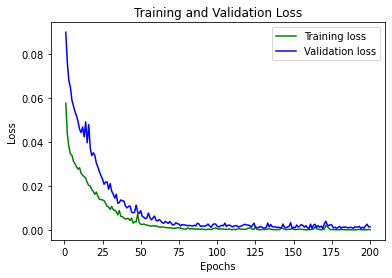

In [248]:
loaded_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics = ['mse'])
history_1 = loaded_model.fit(train_x,train_y,epochs=200,batch_size= 2, verbose = 1, shuffle = True, validation_split = 0.1)
y_pred = loaded_model.predict(test_x)
loss_train = history_1.history['loss']
loss_val = history_1.history['val_loss']
epochs = range(1,201)
print(len(epochs))
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Epoch 1/400
50/50 [==============================] - 1s 9ms/step - loss: 2.1251e-04 - mse: 2.1251e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 2/400
50/50 [==============================] - 0s 6ms/step - loss: 1.4984e-04 - mse: 1.4984e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 3/400
50/50 [==============================] - 0s 6ms/step - loss: 1.2377e-04 - mse: 1.2377e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 4/400
50/50 [==============================] - 0s 7ms/step - loss: 1.2222e-04 - mse: 1.2222e-04 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 5/400
50/50 [==============================] - 0s 6ms/step - loss: 1.2007e-04 - mse: 1.2007e-04 - val_loss: 0.0012 - val_mse: 0.00126
Epoch 6/400
50/50 [==============================] - 0s 6ms/step - loss: 1.1903e-04 - mse: 1.1903e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 7/400
50/50 [==============================] - 0s 6ms/step - loss: 1.1273e-04 - mse: 1.1273e-04 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 8/400
50/50 [=======

50/50 [==============================] - 0s 5ms/step - loss: 9.4482e-05 - mse: 9.4482e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 118/400
50/50 [==============================] - 0s 5ms/step - loss: 9.1332e-05 - mse: 9.1332e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 119/400
50/50 [==============================] - 0s 5ms/step - loss: 1.1626e-04 - mse: 1.1626e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 120/400
50/50 [==============================] - 0s 5ms/step - loss: 1.2223e-04 - mse: 1.2223e-04 - val_loss: 0.0013 - val_mse: 0.0013
Epoch 121/400
50/50 [==============================] - 0s 6ms/step - loss: 9.5533e-05 - mse: 9.5533e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 122/400
50/50 [==============================] - 0s 6ms/step - loss: 9.2219e-05 - mse: 9.2219e-05 - val_loss: 0.0011 - val_mse: 0.0011
Epoch 123/400
50/50 [==============================] - 0s 5ms/step - loss: 7.7873e-05 - mse: 7.7873e-05 - val_loss: 0.0012 - val_mse: 0.0012
Epoch 124/400
50/50 [======

50/50 [==============================] - 0s 6ms/step - loss: 6.9551e-05 - mse: 6.9551e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 232/400
50/50 [==============================] - 0s 5ms/step - loss: 6.4879e-05 - mse: 6.4879e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 233/400
50/50 [==============================] - 0s 5ms/step - loss: 7.2897e-05 - mse: 7.2897e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 234/400
50/50 [==============================] - 0s 6ms/step - loss: 7.5024e-05 - mse: 7.5024e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 235/400
50/50 [==============================] - 0s 5ms/step - loss: 6.9054e-05 - mse: 6.9054e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 236/400
50/50 [==============================] - 0s 5ms/step - loss: 6.5607e-05 - mse: 6.5607e-05 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 237/400
50/50 [==============================] - 0s 6ms/step - loss: 6.9088e-05 - mse: 6.9088e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 238/400
50/50 [======

Epoch 347/400
50/50 [==============================] - 0s 5ms/step - loss: 6.1460e-05 - mse: 6.1460e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 348/400
50/50 [==============================] - 0s 5ms/step - loss: 6.3471e-05 - mse: 6.3471e-05 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 349/400
50/50 [==============================] - 0s 6ms/step - loss: 6.5153e-05 - mse: 6.5153e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 350/400
50/50 [==============================] - 0s 6ms/step - loss: 5.9413e-05 - mse: 5.9413e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 351/400
50/50 [==============================] - 0s 6ms/step - loss: 6.0911e-05 - mse: 6.0911e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 352/400
50/50 [==============================] - 0s 6ms/step - loss: 5.7158e-05 - mse: 5.7158e-05 - val_loss: 0.0017 - val_mse: 0.0017
Epoch 353/400
50/50 [==============================] - 0s 6ms/step - loss: 5.9282e-05 - mse: 5.9282e-05 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 354/400

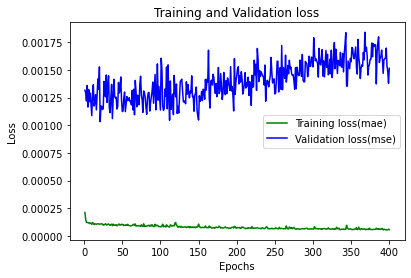

In [249]:
loaded_model.compile(optimizer=Adam(learning_rate=0.0001), loss='mean_squared_error', metrics = ['mse'])
history_2 = loaded_model.fit(train_x,train_y,epochs=400,batch_size= 2, verbose = 1, shuffle = True, validation_split = 0.1)
y_pred = loaded_model.predict(test_x)
loss_train = history_2.history['loss']
loss_val = history_2.history['val_loss']
epochs = range(1,401)
print(len(epochs))
plt.plot(epochs, loss_train, 'g', label='Training loss(mae)')
plt.plot(epochs, loss_val, 'b', label='Validation loss(mse)')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

loaded_model.compile(optimizer=Adam(learning_rate=0.000001), loss='mean_absolute_error', metrics = ['mae', 'mse'])
history_2 = loaded_model.fit(train_x,train_y,epochs=200,batch_size= 1, verbose = 1, shuffle = False)
y_pred = loaded_model.predict(test_x)
loss_train = history_2.history['loss']
loss_val = history_2.history['mse']
epochs = range(1,201)
print(len(epochs))
plt.plot(epochs, loss_train, 'g', label='Training loss(mae)')
plt.plot(epochs, loss_val, 'b', label='Training loss(mse)')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [250]:
y_pred = loaded_model.predict(test_x).reshape(-1,1)
print(mean_squared_error(y_pred, test_y), r2_score(y_pred, test_y))
loaded_model.evaluate(test_x, test_y, batch_size = 2)
test_y_np = np.array(test_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_fs.inverse_transform(y_pred)
y_test_in = scaler_fs.inverse_transform(test_y_np)
print(mean_squared_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))
from sklearn.metrics import mean_absolute_percentage_error
print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100)

0.0011299389312966898 0.9825647682386446
14/14 [==============================] - 0s 4ms/step - loss: 0.0011 - mse: 0.0011    
103.49903985151829 0.982564768474403
6.666353920885201


In [251]:
t = []
k = y_test_in.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in[i])
    m = (float)(y_test_in[i])
    k = [p, m, abs(p-m)] 
    t.append(k)
t = np.array(t)
#print(t)
df = pd.DataFrame(t, columns = ['Prediced', 'True', 'Error'])
df = df.sort_values('Error', ascending = 0)
df.head(20)

,Prediced,True,Error
14,276.363129,301.940,25.576871
25,110.599701,86.530,24.069701
11,211.554962,235.450,23.895038
26,140.724457,120.082,20.642457
24,181.284149,194.430,13.145851
12,87.011230,97.330,10.318770
5,115.221039,105.399,9.822039
1,153.895798,144.424,9.471798
23,60.579899,68.670,8.090101
22,48.895149,54.970,6.074851


In [252]:
y_pred_t = loaded_model.predict(train_x).reshape(-1,1)
print(mean_squared_error(y_pred_t, train_y), r2_score(y_pred_t, train_y))
loaded_model.evaluate(train_x, train_y, batch_size = 2)
test_y_np = np.array(train_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in_t = scaler_fs.inverse_transform(y_pred_t)
y_test_in_t = scaler_fs.inverse_transform(test_y_np)
print(mean_squared_error(y_pred_in_t, y_test_in_t), r2_score(y_pred_in_t, y_test_in_t))
print(mean_absolute_percentage_error(y_test_in_t, y_pred_in_t)*100)

0.00020912230925302597 0.9968646522476028
55/55 [==============================] - 0s 4ms/step - loss: 2.0912e-04 - mse: 2.0912e-04
19.154975305717624 0.9968646529381925
4.062757172842842


y_pred = loaded_model.predict(testing_x)
print(y_pred.shape)
print(mean_absolute_error(y_pred, testing_y), r2_score(y_pred, testing_y))
loaded_model.evaluate(testing_x, testing_y, batch_size = 4)
test_y_np = np.array(testing_y)
test_y_np = test_y_np.reshape(-1,1)
y_pred_in = scaler_fs.inverse_transform(y_pred)
y_test_in = scaler_fs.inverse_transform(test_y_np)
print(mean_absolute_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in))
mean_absolute_percentage_error(y_test_in, y_pred_in)*100

In [253]:
#os.mkdir(path)
os.chdir(path)
os.remove("model.json")
os.remove('info.txt')
os.getcwd()

'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN-30\\new-1'

In [254]:
os.getcwd()

'C:\\Users\\harik\\OneDrive\\Documents\\Python\\Graphene\\ANN-30\\new-1'

In [255]:
t = []
k = y_test_in.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in[i])
    m = (float)(y_test_in[i])
    k = [p, m, abs(p-m)]  
    t.append(k)
t = np.array(t)
#print(t)
df = pd.DataFrame(t, columns = ['Prediced', 'True', 'Error'])
df.to_csv('Pred_True.csv')
t = []
k = y_test_in_t.shape
for i in range(0, k[0]):
    p = (float)(y_pred_in_t[i])
    m = (float)(y_test_in_t[i])
    k = [p, m, abs(p-m)]  
    t.append(k)
t = np.array(t)
#print(t)
df = pd.DataFrame(t, columns = ['Prediced', 'True', 'Error'])
df.to_csv('Pred_True_train.csv')

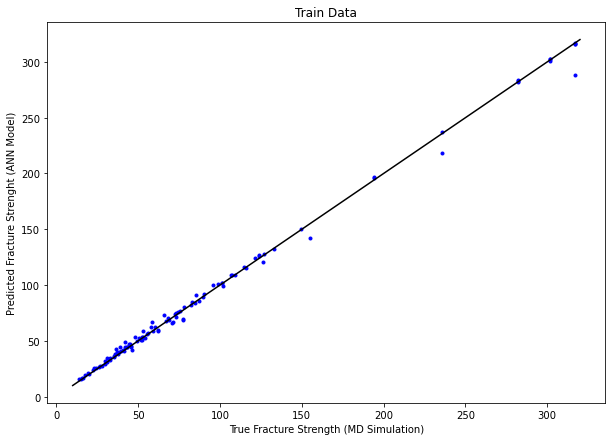

In [256]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(y_test_in_t, y_pred_in_t, marker = '.', c = "blue")
plt.xlabel('True Fracture Strength (MD Simulation)')
plt.ylabel('Predicted Fracture Strenght (ANN Model)')
plt.title('Train Data')
plt.plot([10,320], [10, 320], color = 'black')
plt.savefig('TrueVsPred_train.png', dpi = 100)
plt.show()

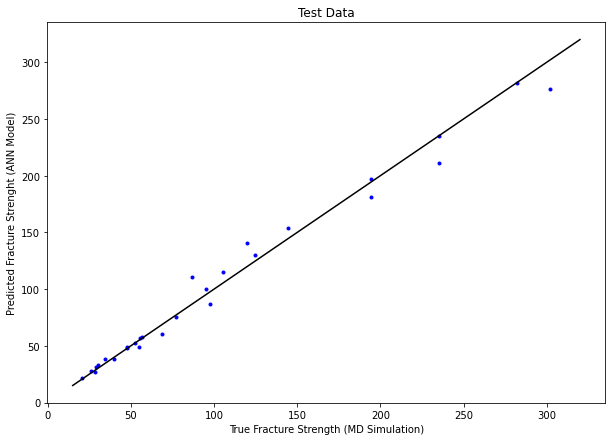

In [257]:
fig = plt.figure(figsize=(10, 7))
plt.scatter(y_test_in, y_pred_in, marker = '.', c = "blue")
plt.xlabel('True Fracture Strength (MD Simulation)')
plt.ylabel('Predicted Fracture Strenght (ANN Model)')
plt.title('Test Data')
plt.plot([15,320], [15, 320], color = 'black')
plt.savefig('TrueVsPred.png', dpi = 100)
plt.show()

In [258]:
model_json = loaded_model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
loaded_model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [259]:
# convert the history.history dict to a pandas DataFrame:     
hist_df_1 = pd.DataFrame(history_1.history) 
hist_df_2 = pd.DataFrame(history_2.history)
hist_df = hist_df_1.append(hist_df_2, ignore_index = True)
hist_df.to_csv('history.csv')
file1 = open("info.txt","a")
file1.write("Learning rate = 0.001 train test split = 0.20 loss = mse validation split - 0.1 of training for 200 epochs\n")
file1.write("Learning rate = 0.0001 train test split = 0.20 loss = mae for 400 epochs\n")
print(mean_squared_error(y_pred, test_y), r2_score(y_pred, test_y),'\n', file = file1)
print(mean_squared_error(y_pred_in, y_test_in), r2_score(y_pred_in, y_test_in), '\n', file = file1)
print(mean_absolute_percentage_error(y_test_in, y_pred_in)*100, '\n', file = file1)
file1.write("The errors on train dataset are \n")
print(mean_squared_error(y_pred_t, train_y), r2_score(y_pred_t, train_y), '\n', file = file1)
print(mean_squared_error(y_pred_in_t, y_test_in_t), r2_score(y_pred_in_t, y_test_in_t), '\n', file = file1)
print(mean_absolute_percentage_error(y_test_in_t, y_pred_in_t)*100, '\n', file = file1)
file1.close()

600


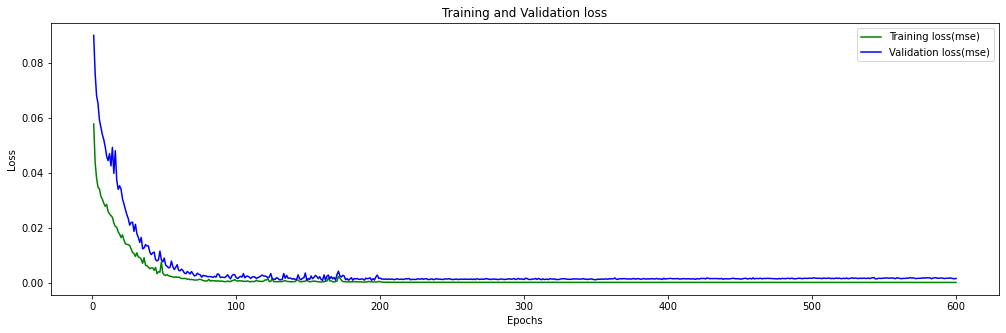

In [260]:
loss_train = hist_df['loss']
loss_val = hist_df['val_loss']
epochs = range(1,601)
print(len(epochs))
fig = plt.figure(figsize=(17, 5))
plt.plot(epochs, loss_train, 'g', label='Training loss(mse)')
plt.plot(epochs, loss_val, 'b', label='Validation loss(mse)')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('Lossvepochs.png', dpi = 100)
plt.legend()
plt.show()

Loaded model from disk
Epoch 1/300
47/47 [==============================] - 2s 38ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0035 - val_mse: 0.0035
Epoch 2/300
47/47 [==============================] - 0s 6ms/step - loss: 0.0107 - mse: 0.0107 - val_loss: 0.0032 - val_mse: 0.0032
Epoch 3/300
47/47 [==============================] - ETA: 0s - loss: 0.0092 - mse: 0.0092     - 0s 6ms/step - loss: 0.0100 - mse: 0.0100 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 4/300
47/47 [==============================] - 0s 6ms/step - loss: 0.0093 - mse: 0.0093 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 5/300
47/47 [==============================] - 2s 33ms/step - loss: 0.0086 - mse: 0.0086 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 6/300
47/47 [==============================] - 0s 6ms/step - loss: 0.0080 - mse: 0.0080 - val_loss: 0.0023 - val_mse: 0.0023
Epoch 7/300
47/47 [==============================] - 0s 6ms/step - loss: 0.0074 - mse: 0.0074 - val_loss: 0.0021 - val_mse: 0.0021
Epoch 8/300
47/

47/47 [==============================] - 1s 33ms/step - loss: 4.9986e-04 - mse: 4.9986e-04 - val_loss: 7.0522e-04 - val_mse: 7.0522e-04
Epoch 116/300
47/47 [==============================] - 0s 6ms/step - loss: 4.9478e-04 - mse: 4.9478e-04 - val_loss: 7.0260e-04 - val_mse: 7.0260e-04
Epoch 117/300
47/47 [==============================] - 0s 5ms/step - loss: 4.9235e-04 - mse: 4.9235e-04 - val_loss: 6.9976e-04 - val_mse: 6.9976e-04
Epoch 118/300
47/47 [==============================] - 0s 5ms/step - loss: 4.8844e-04 - mse: 4.8844e-04 - val_loss: 6.9643e-04 - val_mse: 6.9643e-04
Epoch 119/300
47/47 [==============================] - 1s 32ms/step - loss: 4.8415e-04 - mse: 4.8415e-04 - val_loss: 6.9454e-04 - val_mse: 6.9454e-04
Epoch 120/300
47/47 [==============================] - 0s 5ms/step - loss: 4.7924e-04 - mse: 4.7924e-04 - val_loss: 6.9277e-04 - val_mse: 6.9277e-04
Epoch 121/300
47/47 [==============================] - 0s 5ms/step - loss: 4.7687e-04 - mse: 4.7687e-04 - val_loss: 6.

Epoch 170/300
47/47 [==============================] - 0s 6ms/step - loss: 3.4921e-04 - mse: 3.4921e-04 - val_loss: 5.9583e-04 - val_mse: 5.9583e-04
Epoch 171/300
47/47 [==============================] - 0s 6ms/step - loss: 3.4809e-04 - mse: 3.4809e-04 - val_loss: 5.9298e-04 - val_mse: 5.9298e-04
Epoch 172/300
47/47 [==============================] - 0s 6ms/step - loss: 3.4389e-04 - mse: 3.4389e-04 - val_loss: 5.9268e-04 - val_mse: 5.9268e-04
Epoch 173/300
47/47 [==============================] - 0s 6ms/step - loss: 3.4223e-04 - mse: 3.4223e-04 - val_loss: 5.9383e-04 - val_mse: 5.9383e-04
Epoch 174/300
47/47 [==============================] - 0s 6ms/step - loss: 3.3870e-04 - mse: 3.3870e-04 - val_loss: 5.9125e-04 - val_mse: 5.9125e-04
Epoch 175/300
47/47 [==============================] - 0s 6ms/step - loss: 3.3735e-04 - mse: 3.3735e-04 - val_loss: 5.9121e-04 - val_mse: 5.9121e-04
Epoch 176/300
47/47 [==============================] - 0s 5ms/step - loss: 3.3453e-04 - mse: 3.3453e-04 - 

47/47 [==============================] - 0s 6ms/step - loss: 2.2778e-04 - mse: 2.2778e-04 - val_loss: 4.8380e-04 - val_mse: 4.8380e-04
Epoch 280/300
47/47 [==============================] - 0s 5ms/step - loss: 2.2759e-04 - mse: 2.2759e-04 - val_loss: 4.8238e-04 - val_mse: 4.8238e-04
Epoch 281/300
47/47 [==============================] - 0s 6ms/step - loss: 2.2694e-04 - mse: 2.2694e-04 - val_loss: 4.8107e-04 - val_mse: 4.8107e-04
Epoch 282/300
47/47 [==============================] - 0s 5ms/step - loss: 2.2642e-04 - mse: 2.2642e-04 - val_loss: 4.8253e-04 - val_mse: 4.8253e-04
Epoch 283/300
47/47 [==============================] - 0s 5ms/step - loss: 2.2676e-04 - mse: 2.2676e-04 - val_loss: 4.8321e-04 - val_mse: 4.8321e-04
Epoch 284/300
47/47 [==============================] - 0s 5ms/step - loss: 2.2613e-04 - mse: 2.2613e-04 - val_loss: 4.7915e-04 - val_mse: 4.7915e-04
Epoch 285/300
47/47 [==============================] - 0s 5ms/step - loss: 2.2466e-04 - mse: 2.2466e-04 - val_loss: 4.76

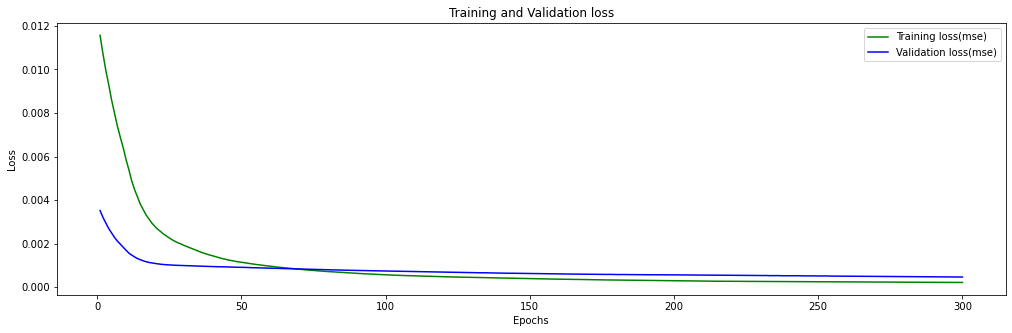

In [282]:
os.chdir(pa)
#loading model from disk
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model.h5")
print("Loaded model from disk")
os.chdir(path)
#training the loaded model
loaded_model.compile(optimizer=Adam(learning_rate=0.00001), loss='mean_squared_error', metrics = ['mse'])
history_1 = loaded_model.fit(train_x,train_y,epochs=300,batch_size= 2, verbose = 1, shuffle = True, validation_split = 0.1)
y_pred = loaded_model.predict(test_x)
loss_train = history_1.history['loss']
loss_val = history_1.history['val_loss']
os.chdir(path)
epochs = range(1,301)
print(len(epochs))
fig = plt.figure(figsize=(17, 5))
plt.plot(epochs, loss_train, 'g', label='Training loss(mse)')
plt.plot(epochs, loss_val, 'b', label='Validation loss(mse)')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.savefig('Lossvepochs_300.png', dpi = 100)
plt.legend()
plt.show()
hist_df_1 = pd.DataFrame(history_1.history) 
#hist_df_2 = pd.DataFrame(history_2.history)
hist_df = hist_df_1#.append(hist_df_2, ignore_index = True)
hist_df.to_csv('History_300.csv')

In [141]:
test_x_in = test_x.copy()
test_x_in.LO = scaler_lat.inverse_transform(test_x_in[['LO']])
test_x_in.CS = scaler_crack.inverse_transform(test_x_in[['CS']])
test_x_in.T = scaler_temp.inverse_transform(test_x_in[['T']]) 

In [142]:
test_x_in

,LO,T,CS
26,0.0,300.0,0.8
86,13.9,600.0,0.5
54,13.9,0.0,0.0
12,0.0,100.0,0.3
65,13.9,100.0,0.2
50,0.0,1200.0,0.5
49,0.0,1200.0,0.4
40,0.0,900.0,0.4
68,13.9,100.0,0.5
20,0.0,300.0,0.2


In [ ]:
from keras.models import model_from_json
json_file = open('model_1.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("model_1.h5")
print("Loaded model from disk")

In [36]:
import scikeras
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# define base model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(8, input_dim=3, kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(64,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(128,  kernel_initializer='normal', activation='relu'))
    #model.add(Dense(128,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(64,  kernel_initializer='normal', activation='relu'))
    model.add(Dense(32, kernel_initializer='normal', activation='relu'))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid')))
    # Compile model
    model.compile(loss='mean_absolute_error', optimizer='adam', metrics = ['mae', 'mse'])
    return model


estimator = KerasRegressor(build_fn=baseline_model, epochs=100, batch_size=2, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator,X= train_x, y = train_y, cv=kfold)
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

D:\ananconda3\lib\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
D:\ananconda3\lib\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(
D:\ananconda3\lib\site-packages\scikeras\wrappers.py:289: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  warnings.warn(


KeyboardInterrupt: 